<a href="https://colab.research.google.com/github/karthikravi123/pytorch_practice/blob/main/CNN_training_customdataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import torch
import os
from PIL import Image
from torchvision import transforms
from torch.utils.data import DataLoader,Dataset

In [3]:
!gdown --fuzzy https://drive.google.com/file/d/1G9H2W0R6JLYYBXyHNM_kAcBufUJr4Qsy/view?usp=sharing

Downloading...
From (original): https://drive.google.com/uc?id=1G9H2W0R6JLYYBXyHNM_kAcBufUJr4Qsy
From (redirected): https://drive.google.com/uc?id=1G9H2W0R6JLYYBXyHNM_kAcBufUJr4Qsy&confirm=t&uuid=02fcbf13-4588-4245-9471-90b724354915
To: /content/Classification_dataset_v3.zip
100% 256M/256M [00:03<00:00, 74.0MB/s]


In [4]:
!unzip '/content/Classification_dataset_v3.zip'

Archive:  /content/Classification_dataset_v3.zip
   creating: Classification_dataset_v3/
  inflating: Classification_dataset_v3/Dataset_info.txt  
   creating: Classification_dataset_v3/images/
   creating: Classification_dataset_v3/images/test/
   creating: Classification_dataset_v3/images/test/Cat/
  inflating: Classification_dataset_v3/images/test/Cat/cat_1000.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1001.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1002.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1003.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1004.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1005.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1006.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1007.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1008.jpg  
  inflating: Classification_dataset_v3/images/test/Cat/cat_1009.jpg 

In [5]:
class ImageDataset(Dataset):
  def __init__(self,image_dir,transform=None):
    self.image_dir = image_dir
    self.image_paths = []
    self.labels = []
    self.class_name = {}
    self.transform = transform

    for label,class_dir in enumerate(os.listdir(image_dir)):
      self.class_name[label] = class_dir
      class_path = os.path.join(image_dir,class_dir)
      for img_name in os.listdir(class_path):
        self.image_paths.append(os.path.join(class_path,img_name))
        self.labels.append(label)

  def __len__(self):
    return len(self.image_paths)

  def __getitem__(self, idx):
    img_path = self.image_paths[idx]
    image = Image.open(img_path).convert("RGB")
    label = self.labels[idx]

    if self.transform:
      image = self.transform(image)

    return image,label



we have make it standarized ,we cant during model

we can make standardize while we are creating the data set in batches


using method transformers

transform.compose([
  #pill image resize to 128x128
  transforms.Resize(),
  transforms.ToTensor(),
  ##pytorch expect to tensor image
]
)

we can use this transform on image when our model is asking for data

In [6]:
transform = transforms.Compose([

  transforms.Resize((128,128)),
  transforms.ToTensor(),
  ##scale image  0 to 1
  transforms.Normalize(mean=[0.5,0.5,0.5],std = [0.5,0.5,0.5])
  #normalize our image -1 to 1,rgb=0.5

]
)

##normalized used for better speed and accuracy,trains faster
# x =255
# ##pixel value =255
# normalized_pixel = (x-0.5)/0.5

In [7]:
train_image_dir = '/content/Classification_dataset_v3/images/train'
test_image_dir = '/content/Classification_dataset_v3/images/test'
train_image_dataset = ImageDataset(image_dir=train_image_dir,transform=transform)
test_image_dataset = ImageDataset(image_dir=test_image_dir,transform=transform)

In [8]:
train_image_loader= DataLoader(dataset=train_image_dataset,batch_size=32,shuffle=True)
test_image_loader= DataLoader(dataset=test_image_dataset,batch_size=32,shuffle=True)

In [9]:
for image,labels in train_image_loader:
  print(image.shape,labels.shape)
  break

torch.Size([32, 3, 128, 128]) torch.Size([32])


In [10]:
import matplotlib.pyplot as plt
import numpy as np

In [11]:
train_image_dataset.class_name

{0: 'Cat', 1: 'person', 2: 'Dog'}

In [12]:
test_image_dataset.class_name

{0: 'Cat', 1: 'person', 2: 'Dog'}

torch.Size([32, 3, 128, 128]) torch.Size([32])
person
(128, 128, 3)
1


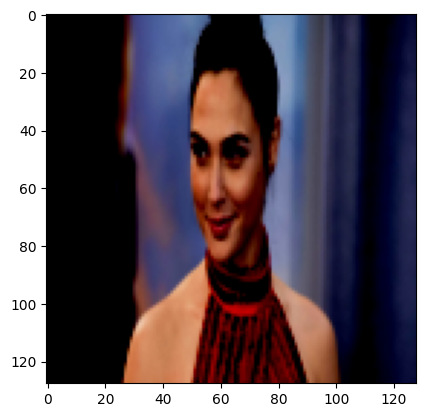

In [13]:
for images,labels in train_image_loader:
  print(images.shape,labels.shape)
  img = images[0].numpy()
  label = labels[0].item()
  print(train_image_dataset.class_name[label])
  img= np.transpose(img,(1,2,0))
  print(img.shape)
  print(label)
  plt.imshow(img,vmin=0,vmax=255)
  break

Custom CNN Architecture

In [14]:
import torch.nn as nn
import torch.optim as optim

In [23]:
class CustomCNNmodel(nn.Module):
  def __init__(self,input_dim,num_classes):
    super(CustomCNNmodel,self).__init__()
    self.input_dim = input_dim
    self.num_classes = num_classes

    self.conv_layers = nn.Sequential(
        nn.Conv2d(3,32,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(32),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.Conv2d(32,64,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(64),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.Conv2d(64,128,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(128),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2),

        nn.Conv2d(128,256,kernel_size=3,stride=1,padding=1),
        nn.BatchNorm2d(256),
        nn.ReLU(),
        nn.MaxPool2d(kernel_size=2,stride=2)

    )



    self._to_linear = None
    self._get_conv_output(self.input_dim)

    ##no of neurons connected to output
    self.fc_layer = nn.Sequential(
        nn.Linear(self._to_linear,512),
        nn.ReLU(),
        #nn.Dropout(0.2)
        nn.Linear(512,128),
        nn.ReLU(),
        nn.Linear(128,128)

    )


  def _get_conv_output(self,input_dim = 128):
    with torch.no_grad():
      ##pytorch expects images in batches
      #batch size =1 ,no of channels= 3
      dummy_input = torch.zeros(1,3,input_dim,input_dim)
      output= self.conv_layers(dummy_input)
      ##flattned shape?
      self._to_linear= output.view(1,-1).size(1)
      #1,2345678

  # number of output channel 32
  def forward(self,x):
    x = self.conv_layers(x)
    x= x.view(x.size(0),-1)
    #flatten it pass to fully connected layer
    x =self.fc_layer(x)
    return x


In [20]:
#initialize model
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
model =CustomCNNmodel(input_dim=128,num_classes=3).to(device)


In [21]:
print(model)

CustomCNNmodel(
  (conv_layers): Sequential(
    (0): Conv2d(3, 32, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): ReLU()
    (3): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (4): Conv2d(32, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (5): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (6): ReLU()
    (7): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (8): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (9): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (10): ReLU()
    (11): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (12): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_sta

In [22]:
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(),lr=0.01)

100 epoch

1000

10 batch size - 100 iteration

1 epoch --->100 iteration
2 epoch --->100 iteration

In [24]:
##training loop

epochs = 2
for epoch in range(epochs):
  model.train()
  ##for each batch
  running_loss = 0.0
  for images,labels in train_image_loader:
    images,labels= images.to(device),labels.to(device)
    #clear gradients
    optimizer.zero_grad()
    outputs =model(images)
    #[x,3,128,128]
    #x=batch
    #single =1
    loss=criterion(outputs,labels)
    loss.backward()
    #update weight
    optimizer.step()
    running_loss+=loss.item()
  print(f"Epoch {epoch+1}/{epochs}, Losss: {running_loss}/{len(train_image_loader)}")

Epoch 1/2, Losss: 770.3590584397316/95
Epoch 2/2, Losss: 73.47885745763779/95


In [25]:
#it has all weight and bias
torch.save(model.state_dict(),"cnn_model.pth")

In [26]:
for i,j in test_image_loader:
  print(labels.shape)
  break

torch.Size([10])


In [30]:
#evaluate model

model.eval()
correct=0
total =0

with torch.no_grad():
  for images,labels in test_image_loader:
    images,labels= images.to(device),labels.to(device)
    output = model(images)
    _,predicted =torch.max(output,1)
    ##pick only

    total += labels.size(0)

    correct += (predicted == labels).sum().item()

print(f"test accuracy is  : {100*correct /total:.2f}")

test accuracy is  : 65.50


In [31]:
import cv2

In [33]:
class ImageClassifier:
  def __init__(self,model_path,class_name):
    self.device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')
    self.model =CustomCNNmodel(input_dim=128,num_classes=3).to(self.device)
    self.model.load_state_dict(torch.load(model_path,map_location=self.device))
    ##will load all weight and biases #otrch.load() will help to load the model
    self.model.eval()
    self.class_names = class_name
    self.transform = transforms.Compose([

            transforms.Resize((128,128)),
            transforms.ToTensor(),
            ##scale image  0 to 1
            transforms.Normalize(mean=[0.5,0.5,0.5],std = [0.5,0.5,0.5])
            #normalize our image -1 to 1,rgb=0.5

          ]
          )

  def predict(self,image_path):
    image = Image.open(image_path).convert("RGB")
    input_tensor = self.transform(image).unsqueeze(0).to(self.device)
    with torch.no_grad():
      output = self.model(input_tensor)
      _,predicted = torch.max(output,1)
      #0 or 1 or 2 convert to dog cat or person from class name
      label = self.class_names[predicted.item()]

    img=cv2.imread(image_path)
    cv2.putText(img,label,(10,30),cv2.FONT_HERSHEY_COMPLEX,1,(255,0,0),2)
    cv2.imwrite("output_image.jpg",img)
    return label

In [36]:
classifier = ImageClassifier("/content/cnn_model.pth",train_image_dataset.class_name)
label = classifier.predict("/content/Classification_dataset_v3/images/train/Dog/dog_0005.jpg")

print(f"predicted class is: {label}")

predicted class is: Dog
